# Exemplos Insights API

### Inicializando a Python SDK

In [79]:
import os
import datetime
from facebookads.api import FacebookAdsApi

my_app_id = os.environ['FB_APP_ID']
my_app_secret = os.environ['FB_APP_SECRET']
my_access_token = os.environ['FB_ACCESS_TOKEN']
FacebookAdsApi.init(my_app_id, my_app_secret, my_access_token)

## Obtendo dados de uma Ad account

### https://graph.facebook.com/v2.8/act_755212577884468/insights
**PATH**: /**ad_account_id**/insights

In [80]:
from facebookads.adobjects.adaccount import AdAccount
from facebookads.adobjects.adsinsights import AdsInsights

ad_account = AdAccount(fbid='act_755212577884468')
params = {
}

stats = ad_account.get_insights(params=params)
print(stats)

[<AdsInsights> {
    "account_id": "755212577884468",
    "date_start": "2016-09-22",
    "date_stop": "2016-10-21",
    "impressions": "120216",
    "spend": "725.67"
}]


## Parâmetros básicos ("level", "field", "time_range")
### https://graph.facebook.com/v2.8/6053021120067/insights?level=ad&fields=impressions,unique_clicks,reach&time_range={"since":"2016-10-07","until":"2016-10-21"}
**PATH**: /**ad_set_id**/insights

**PARAMS**:
* level=[campaign,adset,ad]
* fields=[impressions,unique_clicks,reach,...]
* time_range={"since":"2016-10-07","until":"2016-10-21"}


In [81]:
from facebookads.adobjects.adset import AdSet
from facebookads.adobjects.adsinsights import AdsInsights
import datetime

today = datetime.date.today()
start_time = str(today - datetime.timedelta(weeks=1))
end_time = str(today)

adset = AdSet(fbid='6053021120067')

params = {
    'level': AdsInsights.Level.ad,
    'fields': [
        AdsInsights.Field.impressions,
        AdsInsights.Field.unique_clicks,
        AdsInsights.Field.reach,
    ],
    'time_range': {
        'since': start_time,
        'until': end_time,
    },
}

insights = adset.get_insights(params=params)
print(insights)

[<AdsInsights> {
    "date_start": "2016-10-14",
    "date_stop": "2016-10-21",
    "impressions": "21863",
    "reach": "18588",
    "unique_clicks": "640"
}, <AdsInsights> {
    "date_start": "2016-10-14",
    "date_stop": "2016-10-21",
    "impressions": "3331",
    "reach": "3165",
    "unique_clicks": "82"
}, <AdsInsights> {
    "date_start": "2016-10-14",
    "date_stop": "2016-10-21",
    "impressions": "20191",
    "reach": "16660",
    "unique_clicks": "491"
}]


## Breakdowns
### https://graph.facebook.com/v2.8/6048749323267/insights?breakdowns=["age","gender"]


**PATH**: /**campaign_id**/insights

**PARAMS**:
* breakdowns=[age,gender,...]

In [87]:
from facebookads.adobjects.campaign import Campaign
from facebookads.adobjects.adsinsights import AdsInsights

campaign = Campaign(fbid=6048749323267)

params = {
    'date_preset': AdsInsights.DatePreset.last_7_days,
    'time_increment': 1,
    'breakdowns': [
        AdsInsights.Breakdowns.placement,
    ],
}

params2 = {
    'breakdowns': [
        AdsInsights.Breakdowns.age,
        AdsInsights.Breakdowns.gender,
    ],
    'field': 'campaign_name',
}

insights = list(campaign.get_insights(params=params))
print(len(insights))
print(insights)

9
[<AdsInsights> {
    "account_id": "755212577884468",
    "campaign_id": "6048749323267",
    "date_start": "2016-10-19",
    "date_stop": "2016-10-19",
    "impressions": "7650",
    "placement": "desktop_feed",
    "spend": "51.09"
}, <AdsInsights> {
    "account_id": "755212577884468",
    "campaign_id": "6048749323267",
    "date_start": "2016-10-19",
    "date_stop": "2016-10-19",
    "impressions": "575",
    "placement": "right_hand",
    "spend": "0.16"
}, <AdsInsights> {
    "account_id": "755212577884468",
    "campaign_id": "6048749323267",
    "date_start": "2016-10-19",
    "date_stop": "2016-10-19",
    "impressions": "3998",
    "placement": "mobile_feed",
    "spend": "21.49"
}, <AdsInsights> {
    "account_id": "755212577884468",
    "campaign_id": "6048749323267",
    "date_start": "2016-10-20",
    "date_stop": "2016-10-20",
    "impressions": "10782",
    "placement": "desktop_feed",
    "spend": "86.3"
}, <AdsInsights> {
    "account_id": "755212577884468",
    "

## Plot Placement Breakdown Graph

In [88]:
get_imps = lambda x: [int(i['impressions']) for i in insights[x::3]]

breakdowns = [get_imps(0), get_imps(1), get_imps(2)]
dates = [s['date_start'] for s in insights[0::3]]
print(breakdowns)

[[7650, 10782, 3214], [575, 446, 27], [3998, 8961, 9732]]


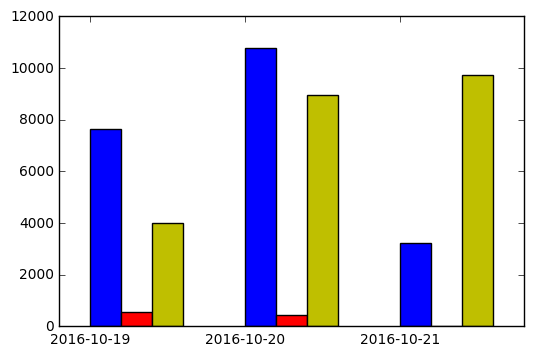

['desktop_feed', 'right_hand', 'mobile_feed']


In [89]:
import matplotlib.pyplot as plt
import numpy as np



n = 3
x = np.arange(n)
width = 0.20
fig, ax = plt.subplots()

colors = ['b', 'r', 'y']
for i, bdown in enumerate(breakdowns):
    ax.bar(x + width * (i + 1), bdown, width, color=colors[i])
ax.set_xticks(x + width)
ax.set_xticklabels(dates)
plt.show()
print([i['placement'] for i in insights[0:3]])

## Filtering
### https://graph.facebook.com/v2.8/act_755212577884468/insights?filtering=[{"field":"campaign.name","operator":"CONTAIN", "value":"Webinar"},{"field":"objective","operator":"CONTAIN", "value":"EVENT_RESPONSES"}]'

**PARAMS**:
* filtering=[filter1, filter2, ...]
* filter={field,operator,value}

In [92]:
from facebookads.adobjects.adaccount import AdAccount
from facebookads.adobjects.adsinsights import AdsInsights

ad_account = AdAccount(fbid='act_755212577884468')
params = {
    'filtering': [{
        'field': 'campaign.name',
        'operator': 'CONTAIN',
        'value': 'Webinar'
    },
    {
        'field': 'objective',
        'operator': 'CONTAIN',
        'value': 'EVENT_RESPONSES'
    }]
}

job = ad_account.get_insights(params=params, async=True)
job.remote_read()
print(job)

<AdReportRun> {
    "account_id": "755212577884468",
    "async_percent_completion": 0,
    "async_status": "Job Started",
    "id": "6053174580467",
    "is_running": true,
    "report_run_id": "6053174580467",
    "time_ref": 1477075208
}


In [94]:
job.remote_read()
print(job)

<AdReportRun> {
    "account_id": "755212577884468",
    "async_percent_completion": 100,
    "async_status": "Job Completed",
    "id": "6053174580467",
    "is_running": true,
    "report_run_id": "6053174580467",
    "time_completed": 1477075209,
    "time_ref": 1477075208
}


In [95]:
print(job.get_result())

[<AdsInsights> {
    "account_id": "755212577884468",
    "date_start": "2016-09-22",
    "date_stop": "2016-10-21",
    "impressions": "67459",
    "spend": "369.79"
}]
